In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# Sparse Hebbian Learning: testing the tools in the package

This notebook aims at show-casing the different tools implemented in the package.


In [3]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 4, 1

In [4]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

In [5]:
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_size=(24, 24), datapath='database/', name_database='kodakdb', n_dictionary=324, learning_algorithm='mp', fit_tol=None, do_precision=False, do_mask=True, l0_sparseness=16, l0_sparseness_end=None, one_over_F=True, n_iter=4096, eta=0.01, do_sym=False, max_patches=4096, seed=42, patch_norm=True, batch_size=512, record_each=128, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, data_cache='data_cache', homeo_method='HAP', homeo_params={'eta_homeo': 0.05, 'alpha_homeo': 0.02})
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_algorithm='mp', matname=None, fit_tol=None, l0_sparseness=None)
 |  
 |  decode(self, sparse_code


## caching tools : loading a database


Extracting data..

ModuleNotFoundError: No module named 'SLIP'

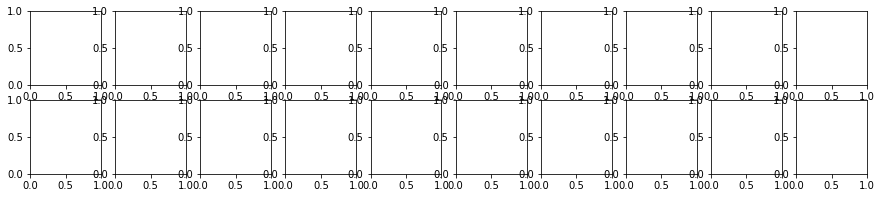

In [6]:
max_patches = 10
fig, axs = plt.subplots(2, max_patches, figsize=(15, 3))
for i, do_mask in enumerate([False, True]):
    data = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, max_patches=max_patches, do_mask=do_mask).get_data()
    cmax = np.max(np.abs(data))
    for j in range(max_patches):
        axs[i, j].imshow(data[j, :].reshape(shl.patch_size),
                         cmap=plt.cm.gray_r, #vmin=-cmax, vmax=+cmax,
                         interpolation='nearest')
        axs[i, j].set_xticks(())
        axs[i, j].set_yticks(())
axs[0, 0].set_ylabel('Without mask')
axs[1, 0].set_ylabel('With mask');

In [ ]:
data = shl.get_data(matname=matname)


## caching tools : loading a database


In [ ]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

Let's first remove potential data cache:

In [ ]:
!rm data_cache/{matname}*

If the data cache does not exist (as a file), it creates it:

In [ ]:
data = shl.get_data(matname=matname)

But if the data cache exists, it loads it:

In [ ]:
data = shl.get_data(matname=matname)


## caching tools : learning, then reloading the dictionary


If the dictionary does not exist (as a file), it learns it:

In [ ]:
list_figures = ['show_dico']
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

But if the dictionary exists, it loads it:

In [ ]:
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)


## caching tools : resuming a learning

If we give a dictionary as an argument to the learning method, then we resume the learning from this dictionary and overwrite the data cache.


In [ ]:
dico = shl.learn_dico(data=data, matname=matname, dictionary=dico.dictionary, list_figures=list_figures)


## caching tools : coding


In [ ]:
%%time
sparse_code = shl.code(data, dico)

In [ ]:
sparse_code = shl.code(data, dico, matname=matname)

## plotting tools

The simplest solution is to pass a list of figures to the learning method:

In [ ]:
list_figures = ['show_dico',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(matname=matname, list_figures=list_figures)

But one can also generate every single figure independently:

In [ ]:
shl.plot_variance(sparse_code);

In [ ]:
shl.plot_variance_histogram(sparse_code);

And combine them:

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(13, 8))
fig, axs[0] = shl.plot_variance(sparse_code, fig=fig, ax=axs[0])
fig, axs[1] = shl.plot_variance_histogram(sparse_code, fig=fig, ax=axs[1])

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts